In [1]:
# Reward function shaping in this script -- no terminal reward
# Using the scaled datasets and clearing the existing rewards
# Add rewards based on SOFA scores

In [2]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle

In [3]:
#df_train = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_train_set_scaled.csv')
#df_val =  pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_val_set_scaled.csv')
#df_test = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_test_set_scaled.csv')

In [3]:
df_train_disc = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_train_data_discrete.csv')
df_val_disc = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_val_data_discrete.csv')
df_test_disc = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_test_data_discrete.csv')

In [5]:
df_train_disc.head()

,stay_id,state,reward,max_dose_vaso,mortality
0,34712382,11,0,2.0,0
1,34712382,11,0,2.0,0
2,34712382,11,0,2.0,1
3,34712382,11,-100,2.0,1
4,30902754,15,0,4.0,1


In [7]:
len(df_train_disc)

4207154

In [8]:
df_test_disc.head()

,stay_id,state,reward,max_dose_vaso,mortality
0,30223578,16,0,4.0,1
1,30223578,16,0,4.0,1
2,30223578,16,0,4.0,1
3,30223578,16,0,4.0,1
4,30223578,16,0,4.0,1


In [9]:
# Clear existing rewards
df_train_disc['reward'] = 0
df_val_disc['reward'] = 0
df_test_disc['reward'] = 0

In [10]:
orig_df = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\Final2.csv')

In [11]:
c0 = -0.25
c1 = -0.75
#c2 = -0.5

In [12]:
# add rewards

# Store relevant columns in variables
sofa_cur = orig_df['sofa_score']
sofa_prev = orig_df['sofa_score'].shift(1)

# Calculate masks for conditions
is_same_sofa = sofa_cur == sofa_prev
is_non_zero_sofa = sofa_cur != 0

# Calculate the shaped reward using vectorized operations
reward = np.where((orig_df['stay_id'] == orig_df['stay_id'].shift(1)) & is_same_sofa & is_non_zero_sofa, c0, 0) + c1 * (sofa_cur - sofa_prev)

# Assign the calculated reward to the 'shaped_reward' column, shifted by one row
orig_df['shaped_reward'] = reward.shift(1).fillna(0)

# Print progress for every 10000 rows
for i in range(0, len(orig_df), 10000):
    print(i)

print(orig_df['shaped_reward'].value_counts())

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [13]:
print(orig_df['shaped_reward'].value_counts())

-0.25     6035065
 0.00        2104
-0.75         188
 1.50         130
-1.50         126
 0.75         126
-2.25          91
 2.25          79
-3.00          72
 3.00          70
-3.75          55
 3.75          53
 5.25          35
 4.50          32
-5.25          31
-4.50          28
 6.00          17
-6.00          17
-6.75          11
 7.50           7
 8.25           5
-7.50           5
 6.75           4
 9.00           3
 9.75           3
-8.25           2
-9.00           2
-12.75          1
 12.75          1
-9.75           1
 11.25          1
Name: shaped_reward, dtype: int64


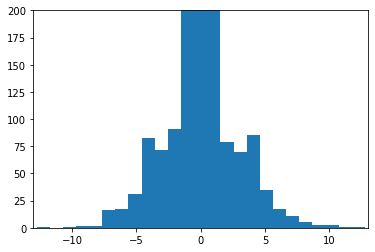

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(orig_df['shaped_reward'], bins=25)
plt.xlim([-13, 13])  # Set x-axis limits to -13 and 13
plt.ylim([0,200]) #Set y-axis limits till 200 to show other values distribution instead of just -0.25
plt.show()

In [15]:
train_ids = df_train_disc['stay_id'].unique()
val_ids = df_val_disc['stay_id'].unique()
test_ids = df_test_disc['stay_id'].unique()

In [16]:
train_rewards = orig_df.loc[orig_df['stay_id'].isin(train_ids)]['shaped_reward']

In [17]:
len(train_rewards)

4207154

In [18]:
train_rewards.tail()

6037832   -0.25
6037833   -0.25
6037834   -0.25
6037835   -0.25
6037836   -0.25
Name: shaped_reward, dtype: float64

In [19]:
# check this works as expected
val_rewards = orig_df.loc[orig_df['stay_id'].isin(val_ids)]['shaped_reward']

In [20]:
test_rewards = orig_df.loc[orig_df['stay_id'].isin(test_ids)]['shaped_reward']

In [21]:
len(test_rewards)

1175565

In [22]:
len(val_rewards)

655646

In [23]:
len(orig_df)

6038365

In [24]:
df_train_disc.tail()

,stay_id,state,reward,max_dose_vaso,mortality
4207149,34763877,4,0,3.0,1
4207150,34763877,4,0,3.0,1
4207151,34763877,4,0,3.0,1
4207152,34763877,4,0,3.0,1
4207153,34763877,4,0,3.0,1


In [25]:
len(orig_df['shaped_reward'])

6038365

In [26]:
len(df_train_disc)

4207154

In [27]:
# check that this sums to the total number of data items -- needs to be re-run
len(df_train_disc) + len(df_test_disc) + len(df_val_disc)

6038365

In [53]:
#df_train['reward'] += np.array(train_rewards)
#df_val['reward'] += np.array(val_rewards)
#df_test['reward'] += np.array(test_rewards)

In [28]:
df_train_disc['reward'] += np.array(train_rewards)
df_val_disc['reward'] += np.array(val_rewards)
df_test_disc['reward'] += np.array(test_rewards)

In [54]:
#df_train.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_train_data_final_cont_noterm.csv',index=False)
#df_val.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_val_data_final_cont_noterm.csv', index=False)
#df_test.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_test_data_final_cont_noterm.csv',index=False)

In [29]:
df_train_disc.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_train_data_final_disc.csv',index=False)
df_val_disc.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_val_data_final_disc.csv', index=False)
df_test_disc.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_test_data_final_disc.csv',index=False)